In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot

**2. Load the dataset**

In [ ]:
data = pd.read_csv('/content/Housing.csv')

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [ ]:
data.replace('?',np.nan,inplace=True)

In [ ]:
data.shape

(545, 12)

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


**3. Perform Below Visualizations**

**Univariate Analysis**

<Axes: >

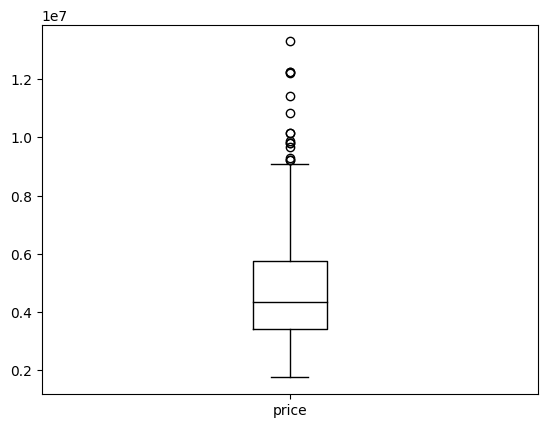

In [ ]:
#boxplot
data.boxplot(column=['price'], grid=False, color='black')

<Axes: >

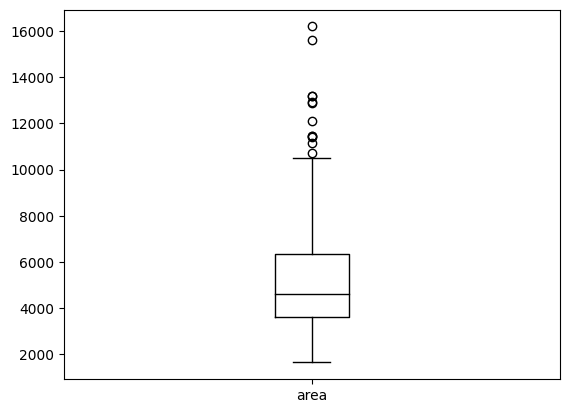

In [ ]:
#boxplot
data.boxplot(column=['area'], grid=False, color='black')

<Axes: >

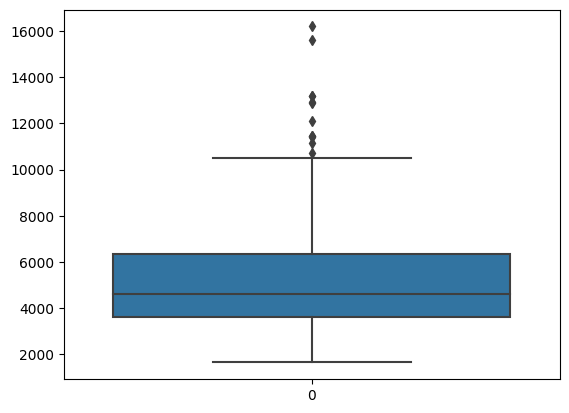

In [ ]:
sns.boxplot(data.area)

<Axes: xlabel='basement', ylabel='Count'>

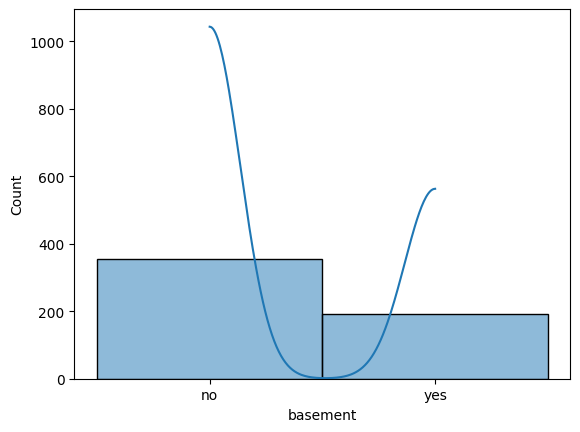

In [ ]:
#histogram
sns.histplot(data.basement,kde=True)

<Axes: xlabel='parking', ylabel='Count'>

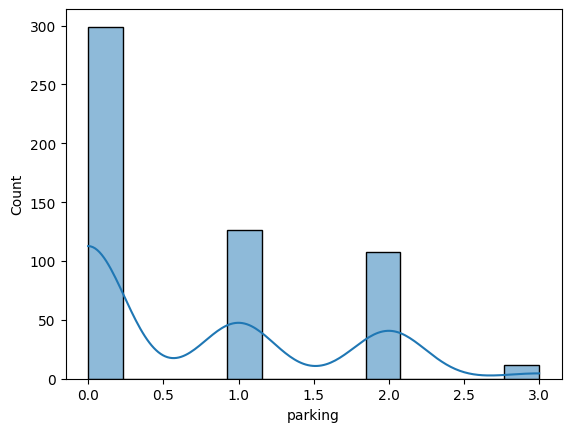

In [ ]:
sns.histplot(data.parking,kde=True)

<Axes: xlabel='stories', ylabel='Density'>

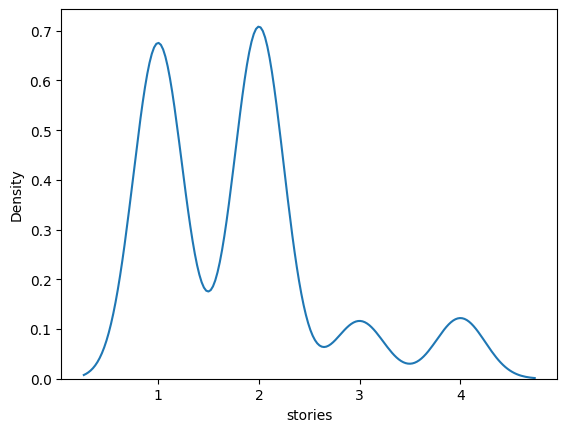

In [ ]:
#density plot
sns.kdeplot(data['stories'])

**Bi Variate Analysis**

Text(0, 0.5, 'Price')

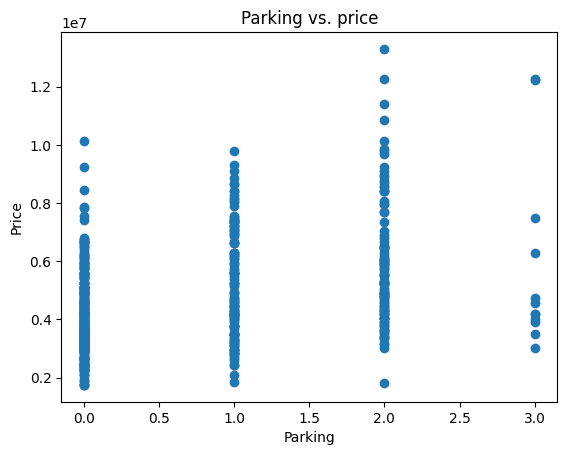

In [ ]:
#Scatter Plot
plt.scatter(data.parking, data.price)
plt.title('Parking vs. price')
plt.xlabel('Parking')
plt.ylabel('Price')

Text(0, 0.5, 'Area')

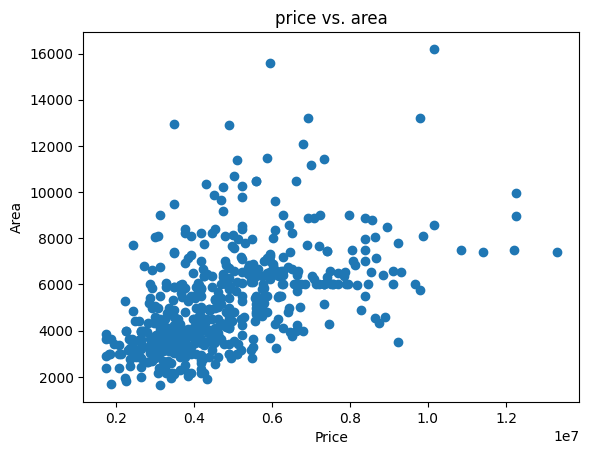

In [ ]:
#Scatter Plot
plt.scatter(data.price, data.area)
plt.title('price vs. area')
plt.xlabel('Price')
plt.ylabel('Area')

Text(0, 0.5, 'Stories')

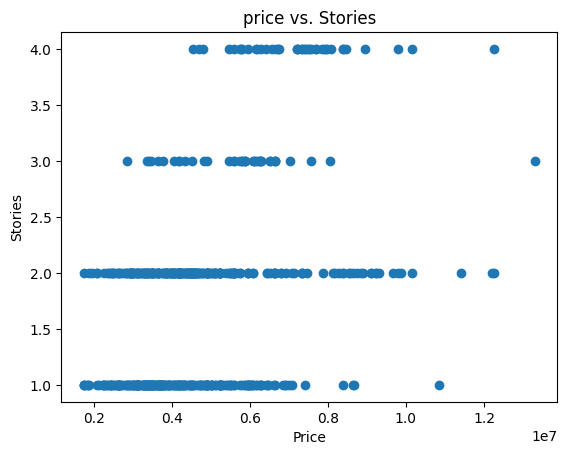

In [ ]:
#Scatter Plot
plt.scatter(data.price, data.stories)
plt.title('price vs. Stories')
plt.xlabel('Price')
plt.ylabel('Stories')

In [ ]:
#Correlation

data.corr()

<ipython-input-22-02a4d5841cb9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [ ]:
#Simple Linear Regression
import statsmodels.api as sm

#define response variable
y = data['price']

#define explanatory variable
x = data[['area']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           7.39e-42
Time:                        05:50:32   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     13.681      0.0

**Multivariate Analysis**

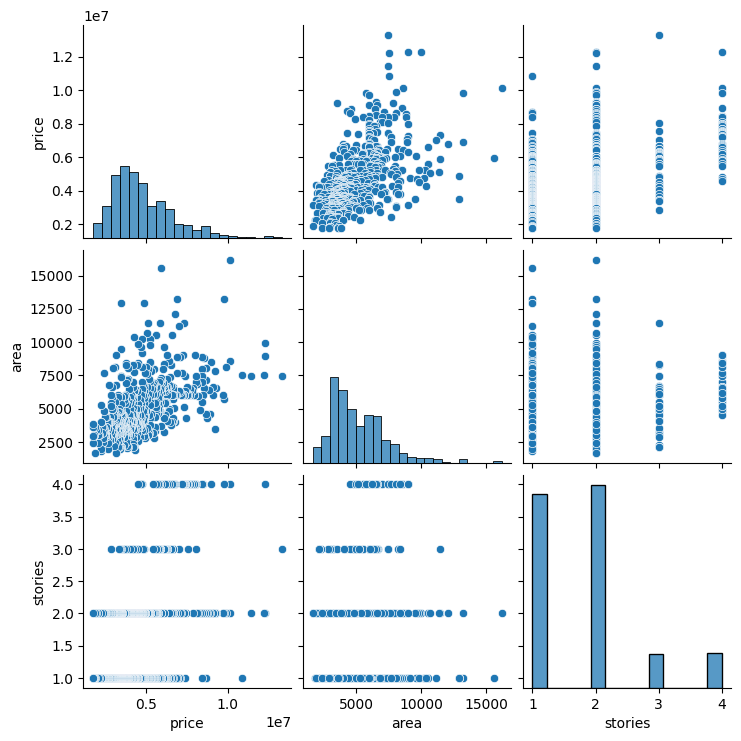

In [ ]:
sns.pairplot(data = data[['price', 'area', 'stories']])

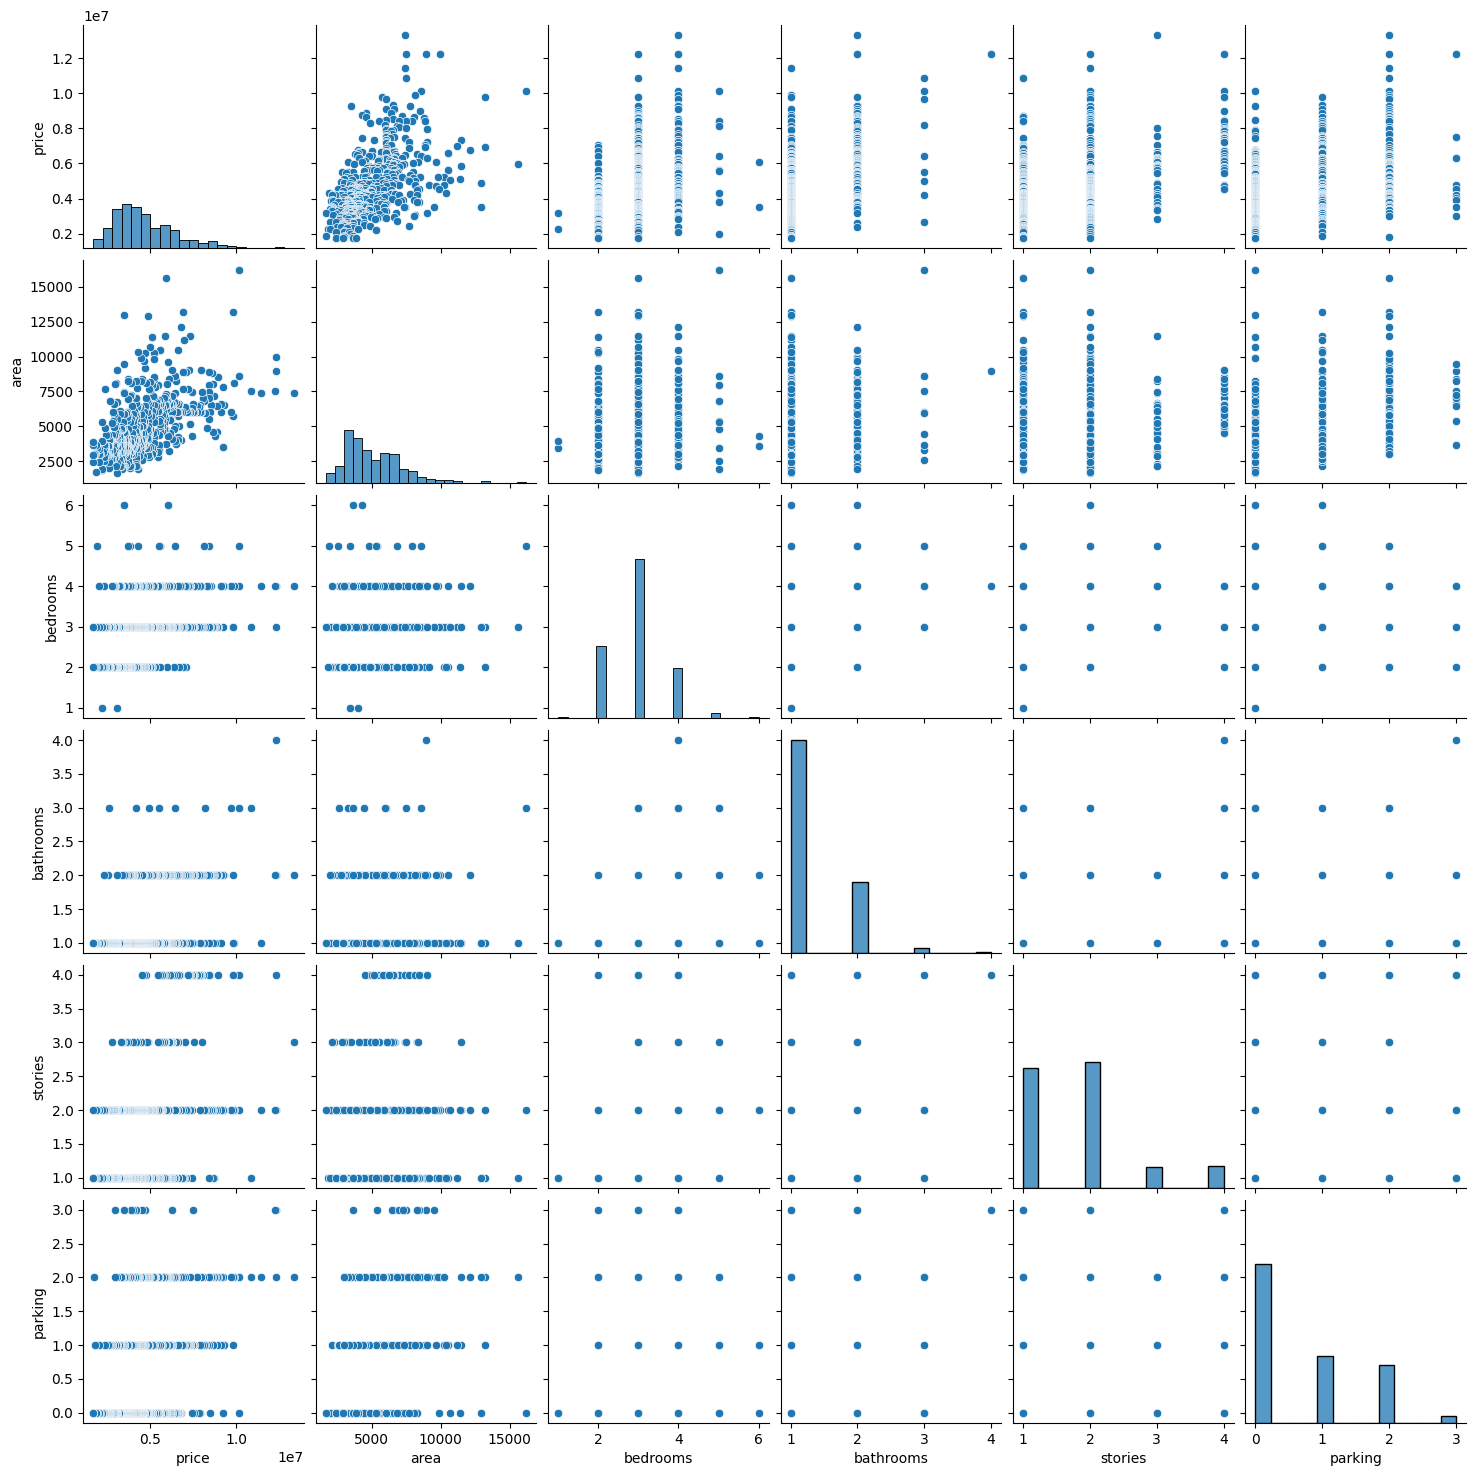

In [ ]:
sns.pairplot(data)

**4. Perform descriptive statistics on the dataset**

In [ ]:
stats = data.describe(include = 'all')
print(stats)

               price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545       

In [ ]:
data.mean()

<ipython-input-27-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [ ]:
data.median()

<ipython-input-28-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [ ]:
data.max()

price                  13300000
area                      16200
bedrooms                      6
bathrooms                     4
stories                       4
mainroad                    yes
guestroom                   yes
basement                    yes
hotwaterheating             yes
airconditioning             yes
parking                       3
furnishingstatus    unfurnished
dtype: object

In [ ]:
data.std()

<ipython-input-30-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

**5. Handle the Missing values**

In [ ]:
data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isnull(data["parking"])

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: parking, Length: 545, dtype: bool

In [ ]:
data['area'].fillna(data['area'].mean(),inplace=True)

**6. Find the outliers and replace the outliers**

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['parking']))
print(z)

0      1.517692
1      2.679409
2      1.517692
3      2.679409
4      1.517692
         ...   
540    1.517692
541    0.805741
542    0.805741
543    0.805741
544    0.805741
Name: parking, Length: 545, dtype: float64


In [ ]:
threshold = 2

# Position of the outlier
print(np.where(z > 2))

(array([  1,   3,  47,  93, 225, 247, 299, 304, 323, 331, 401, 472]),)


In [ ]:
Q1 = np.percentile(data['parking'], 25, method='midpoint')
Q3 = np.percentile(data['parking'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1.0


In [ ]:
# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(data['parking']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(data['parking']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 2.5
12
Lower Bound: -1.5
0


**Removing the outliers**

In [ ]:
print("Old Shape: ", data.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = data['parking'].quantile(0.25)
Q3 = data['parking'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['parking']>=upper)[0]
lower_array = np.where(data['parking']<=lower)[0]

# Removing the outliers
data['parking'].drop(index=upper_array, inplace=True)
data['parking'].drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", data['parking'].shape)

Old Shape:  (545, 12)
New Shape:  (545,)


In [ ]:
median = data.loc[data['parking']<13, 'parking'].median()
data.loc[data.parking > 13, 'parking'] = np.nan
data.fillna(median,inplace=True)

**7. Check for Categorical columns and perform encoding**

**Label Encoding**

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.price=le.fit_transform(data.price)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,218,7420,4,2,3,yes,no,no,no,yes,2.0,furnished
1,217,8960,4,4,4,yes,no,no,no,yes,3.0,furnished
2,217,9960,3,2,2,yes,no,yes,no,no,2.0,semi-furnished
3,216,7500,4,2,2,yes,no,yes,no,yes,3.0,furnished
4,215,7420,4,1,2,yes,yes,yes,no,yes,2.0,furnished


In [ ]:
data.area=le.fit_transform(data.price)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,218,218,4,2,3,yes,no,no,no,yes,2.0,furnished
1,217,217,4,4,4,yes,no,no,no,yes,3.0,furnished
2,217,217,3,2,2,yes,no,yes,no,no,2.0,semi-furnished
3,216,216,4,2,2,yes,no,yes,no,yes,3.0,furnished
4,215,215,4,1,2,yes,yes,yes,no,yes,2.0,furnished


**One Hot encoding**

In [ ]:
data_main=pd.get_dummies(data,columns=['stories'])

In [ ]:
data_main.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,stories_1,stories_2,stories_3,stories_4
0,218,218,4,2,yes,no,no,no,yes,2.0,furnished,0,0,1,0
1,217,217,4,4,yes,no,no,no,yes,3.0,furnished,0,0,0,1
2,217,217,3,2,yes,no,yes,no,no,2.0,semi-furnished,0,1,0,0
3,216,216,4,2,yes,no,yes,no,yes,3.0,furnished,0,1,0,0
4,215,215,4,1,yes,yes,yes,no,yes,2.0,furnished,0,1,0,0


In [ ]:
data_main.corr()

<ipython-input-46-63ebd167fcb1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,price,area,bedrooms,bathrooms,parking,stories_1,stories_2,stories_3,stories_4
price,1.000000,1.000000,0.373302,0.493090,0.363694,-0.266898,-0.017796,0.158267,0.377645
area,1.000000,1.000000,0.373302,0.493090,0.363694,-0.266898,-0.017796,0.158267,0.377645
bedrooms,0.373302,0.373302,1.000000,0.373930,0.139270,-0.510235,0.377769,0.100010,0.145561
bathrooms,0.493090,0.493090,0.373930,1.000000,0.177496,-0.251905,0.080144,0.040225,0.280809
parking,0.363694,0.363694,0.139270,0.177496,1.000000,0.015383,-0.043285,-0.074838,0.125775
stories_1,-0.266898,-0.266898,-0.510235,-0.251905,0.015383,1.000000,-0.743907,-0.234561,-0.240977
stories_2,-0.017796,-0.017796,0.377769,0.080144,-0.043285,-0.743907,1.000000,-0.244442,-0.251128
stories_3,0.158267,0.158267,0.100010,0.040225,-0.074838,-0.234561,-0.244442,1.000000,-0.079183
stories_4,0.377645,0.377645,0.145561,0.280809,0.125775,-0.240977,-0.251128,-0.079183,1.000000


<ipython-input-47-e3804b10e5ac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

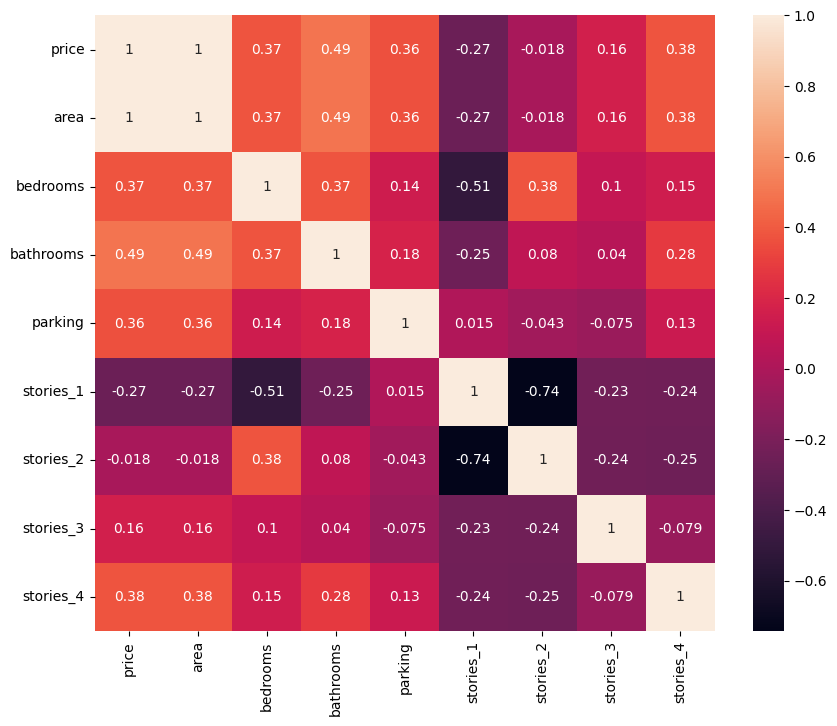

In [ ]:
#Heat Map
plt.figure(figsize=(10,8))
sns.heatmap(data_main.corr(),annot=True)

**8. Split the data into dependent and independent variables**

In [ ]:
# Y is dependent variable(target)
y=data_main['price']
y.head()

0    218
1    217
2    217
3    216
4    215
Name: price, dtype: int64

In [ ]:
# X is independent variable or predictors
X=data_main.drop(columns=['price', 'hotwaterheating', 'basement', 'airconditioning', 'furnishingstatus', 'mainroad', 'guestroom'],axis=1)
X.head()

,area,bedrooms,bathrooms,parking,stories_1,stories_2,stories_3,stories_4
0,218,4,2,2.0,0,0,1,0
1,217,4,4,3.0,0,0,0,1
2,217,3,2,2.0,0,1,0,0
3,216,4,2,3.0,0,1,0,0
4,215,4,1,2.0,0,1,0,0


**9. Scale the independent variables**

In [ ]:
name=X.columns
name

Index(['area', 'bedrooms', 'bathrooms', 'parking', 'stories_1', 'stories_2',
       'stories_3', 'stories_4'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [ ]:
X_scaled=scale.fit_transform(X)
X_scaled

array([[1.        , 0.6       , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.99541284, 0.6       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.99541284, 0.4       , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.4       , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
X=pd.DataFrame(X_scaled,columns=name)
X

,area,bedrooms,bathrooms,parking,stories_1,stories_2,stories_3,stories_4
0,1.000000,0.6,0.333333,0.666667,0.0,0.0,1.0,0.0
1,0.995413,0.6,1.000000,1.000000,0.0,0.0,0.0,1.0
2,0.995413,0.4,0.333333,0.666667,0.0,1.0,0.0,0.0
3,0.990826,0.6,0.333333,1.000000,0.0,1.0,0.0,0.0
4,0.986239,0.6,0.000000,0.666667,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
540,0.009174,0.2,0.000000,0.666667,1.0,0.0,0.0,0.0
541,0.004587,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0
542,0.000000,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0
543,0.000000,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0


**10. Split the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.head()

,area,bedrooms,bathrooms,parking,stories_1,stories_2,stories_3,stories_4
542,0.000000,0.2,0.0,0.0,1.0,0.0,0.0,0.0
496,0.100917,0.2,0.0,0.0,1.0,0.0,0.0,0.0
484,0.123853,0.2,0.0,0.0,1.0,0.0,0.0,0.0
507,0.082569,0.2,0.0,0.0,1.0,0.0,0.0,0.0
252,0.435780,0.4,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_test.head()

,area,bedrooms,bathrooms,parking,stories_1,stories_2,stories_3,stories_4
239,0.449541,0.4,0.0,0.333333,0.0,1.0,0.0,0.0
113,0.674312,0.4,0.0,0.666667,1.0,0.0,0.0,0.0
325,0.330275,0.6,0.0,0.000000,0.0,1.0,0.0,0.0
66,0.788991,0.2,0.0,0.333333,1.0,0.0,0.0,0.0
479,0.128440,0.6,0.0,0.000000,0.0,1.0,0.0,0.0


In [ ]:
y_train

542      0
496     22
484     27
507     18
252     95
      ... 
70     169
277     85
9      211
359     62
192    117
Name: price, Length: 436, dtype: int64

In [ ]:
y_test

239     98
113    147
325     72
66     172
479     28
      ... 
76     165
132    140
311     77
464     34
155    133
Name: price, Length: 109, dtype: int64

**Predicting Housing Price using Linear Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

2.842170943040401e-14


In [ ]:
lm.coef_

array([ 2.18000000e+02,  5.09309693e-14,  6.56039411e-14, -9.06361449e-14,
       -3.53024649e-14, -8.03981922e-15, -1.75456812e-14, -4.83003205e-14])

In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

,coeff
area,2.180000e+02
bedrooms,5.093097e-14
bathrooms,6.560394e-14
parking,-9.063614e-14
stories_1,-3.530246e-14
stories_2,-8.039819e-15
stories_3,-1.754568e-14
stories_4,-4.830032e-14


In [ ]:
predictions = lm.predict(X_test)
predictions

array([1.03000000e+02, 2.05000000e+02, 1.82000000e+02, 6.40000000e+01,
       6.50000000e+01, 6.10000000e+01, 1.89000000e+02, 5.40000000e+01,
       7.60000000e+01, 1.24000000e+02, 8.10000000e+01, 2.12000000e+02,
       4.40000000e+01, 7.50000000e+01, 1.53000000e+02, 1.22000000e+02,
       4.00000000e+01, 1.62000000e+02, 5.60000000e+01, 9.30000000e+01,
       1.46000000e+02, 1.45000000e+02, 1.63000000e+02, 1.45000000e+02,
       9.70000000e+01, 9.00000000e+01, 3.20000000e+01, 8.10000000e+01,
       5.90000000e+01, 1.80000000e+02, 1.45000000e+02, 6.00000000e+00,
       1.96000000e+02, 4.00000000e+01, 1.30000000e+02, 4.80000000e+01,
       1.07000000e+02, 1.06000000e+02, 5.40000000e+01, 1.80000000e+01,
       9.80000000e+01, 2.15000000e+02, 1.18000000e+02, 8.10000000e+01,
       2.10000000e+01, 5.10000000e+01, 4.90000000e+01, 1.02000000e+02,
       1.55000000e+02, 8.10000000e+01, 6.50000000e+01, 1.20000000e+02,
       2.17000000e+02, 4.40000000e+01, 1.21000000e+02, 7.40000000e+01,
      

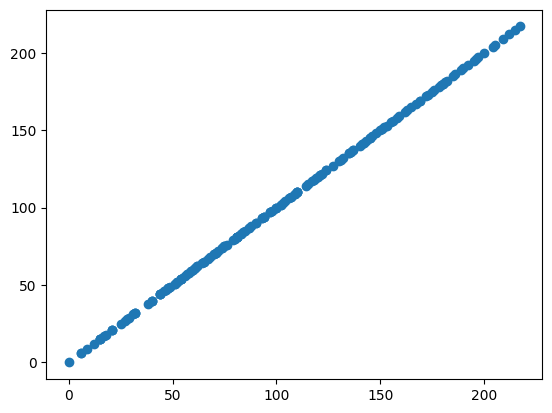

In [ ]:
plt.scatter(y_test,predictions)

<ipython-input-69-5eafd2b47918>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='price', ylabel='Density'>

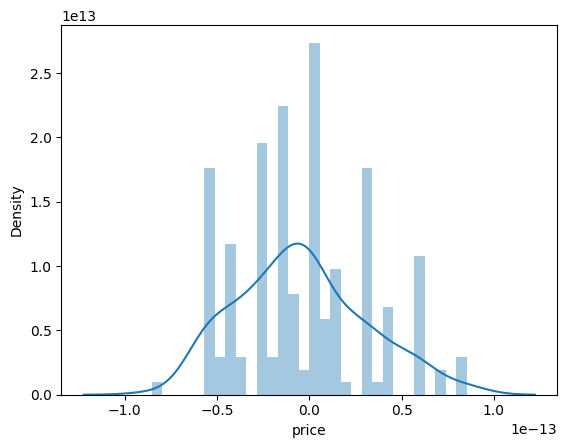

In [ ]:
sns.distplot(y_test-predictions,bins=30)